In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl

In [60]:
with open('Task_2_DQN/data_list.pkl', 'rb') as f:
    data_list = pkl.load(f)

with open('Task_2_DQN/rewards_history_ddqn.pkl', 'rb') as f:
    rh_ddqn = pkl.load(f)

with open('Task_2_DQN/rewards_history_dueling.pkl', 'rb') as f:
    rh_dueling = pkl.load(f)

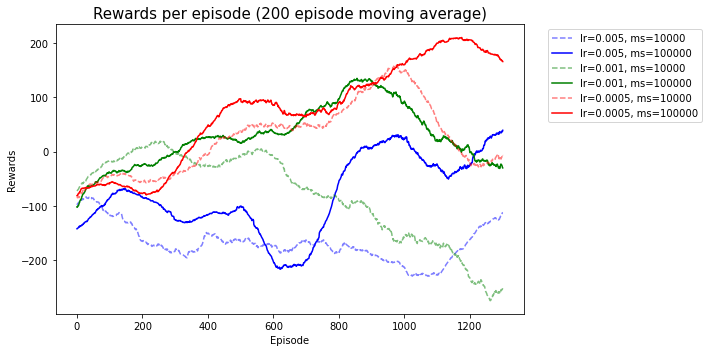

In [79]:
plt.figure(figsize=(10,5))
for data in data_list:
    i, lr, ms, rh = data
    avg_rh = np.convolve(rh[i-1], np.ones((200,))/200, mode='valid')
    if ms == 10000:
        linestyle = '--'
        alpha = 0.5
    else:
        linestyle = '-'
        alpha = 1
    
    if lr == 0.005:
        color='blue'
    elif lr == 0.001:
        color='green'
    elif lr == 0.0005:
        color='red'

    plt.plot(avg_rh, label='lr={}, ms={}'.format(lr, ms), linestyle=linestyle, alpha=alpha, color=color)
plt.title('Rewards per episode (200 episode moving average)', fontsize=15)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()


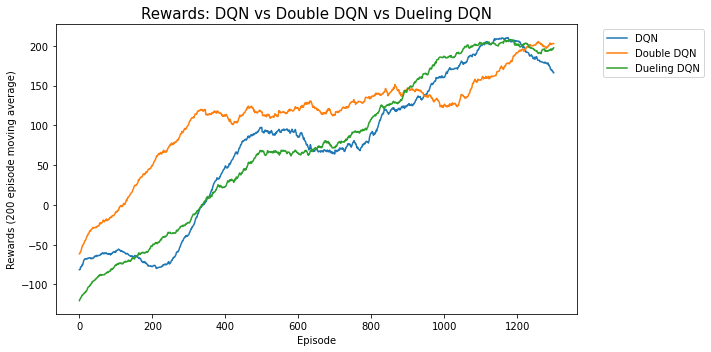

In [83]:
rh_dqn = data_list[-1][-1][-1]

# calculate averages
MA = 200
avg_rh_dqn = np.convolve(rh_dqn, np.ones((MA,))/MA, mode='valid')
avg_rh_ddqn = np.convolve(rh_ddqn, np.ones((MA,))/MA, mode='valid')
avg_rh_dueling = np.convolve(rh_dueling, np.ones((MA,))/MA, mode='valid')


plt.figure(figsize=(10,5))
# rewards
# plt.plot(rh_dqn, '-', alpha=0.8, color='green') 
# plt.plot(rh_ddqn, '-', alpha=0.8, color='skyblue') 
# plt.plot(rh_dueling, '-', alpha=0.8, color='bisque')
# average rewards
plt.plot(avg_rh_dqn, '-', label='DQN') 
plt.plot(avg_rh_ddqn, '-', label='Double DQN') 
plt.plot(avg_rh_dueling, '-', label='Dueling DQN') 
# legends
plt.title('Rewards: DQN vs Double DQN vs Dueling DQN', fontsize=15)
plt.xlabel('Episode')
plt.ylabel('Rewards ({} episode moving average)'.format(MA))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()

In [43]:
len(rh_ddqn)

1500

        DQN Reward:     Mean: 66.9, Median: 51.2, Std: 165.1
Dueling DQN Reward:     Mean: 67.8, Median: 64.1, Std: 162.4
 Double DQN Reward:     Mean: 103.4, Median: 171.1, Std: 159.8


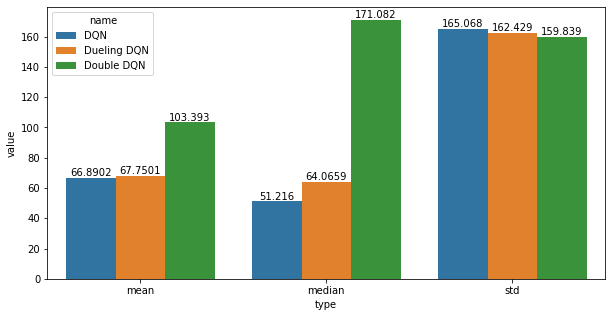

In [90]:
# compute average reward
avg_reward_dqn = np.mean(rh_dqn)
avg_reward_ddqn = np.mean(rh_ddqn)
avg_reward_dueling = np.mean(rh_dueling)

# compute median
median_reward_dqn = np.median(rh_dqn)
median_reward_ddqn = np.median(rh_ddqn)
median_reward_dueling = np.median(rh_dueling)

# compute standard deviation
std_reward_dqn = np.std(rh_dqn)
std_reward_ddqn = np.std(rh_ddqn)
std_reward_dueling = np.std(rh_dueling)

# compute nr of times where rewards >200
# nr_solved_dqn = np.sum(np.array(rh_dqn) > 200)
# nr_solved_ddqn = np.sum(np.array(rh_ddqn) > 200)
# nr_solved_dueling = np.sum(np.array(rh_dueling) > 200)

# print average rewards, median, standard deviation and nr of times where rewards >200
print('        DQN Reward:     Mean: {:.1f}, Median: {:.1f}, Std: {:.1f}'.format(avg_reward_dqn, median_reward_dqn, std_reward_dqn))
print('Dueling DQN Reward:     Mean: {:.1f}, Median: {:.1f}, Std: {:.1f}'.format(avg_reward_dueling, median_reward_dueling, std_reward_dueling))
print(' Double DQN Reward:     Mean: {:.1f}, Median: {:.1f}, Std: {:.1f}'.format(avg_reward_ddqn, median_reward_ddqn, std_reward_ddqn))


data = pd.DataFrame({'mean': [avg_reward_dqn, avg_reward_dueling, avg_reward_ddqn],
                     'median': [median_reward_dqn, median_reward_dueling, median_reward_ddqn],
                     'std': [std_reward_dqn, std_reward_dueling, std_reward_ddqn],
                     'name': ['DQN', 'Dueling DQN', 'Double DQN']})

plt.figure(figsize=(10,5))
# plot mean, median and std
data = pd.melt(data, id_vars=['name'], value_vars=['mean', 'median', 'std'], var_name='type', value_name='value')
ax = sns.barplot(x='type', y='value', hue='name', data=data) # add labels
for container in ax.containers:
    ax.bar_label(container)
plt.show()



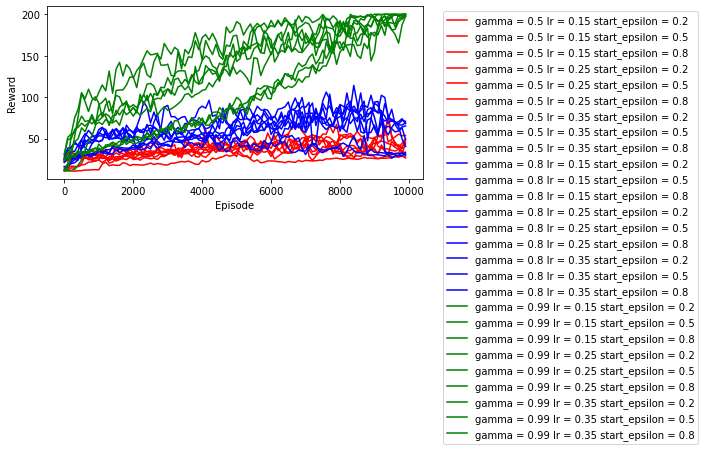

In [100]:
# load q_table_list and data_list
data_list = np.load('Task_1_Q_learning/data_list.npy', allow_pickle=True)

# plot all items in data_list
episodes = 10000
timestep = 100
ep = [i for i in range(0, episodes, timestep)] 
plt.figure(figsize=(10,5))
for i in range(len(data_list)):
    gamma = data_list[i]['gamma']
    lr = data_list[i]['lr']
    epsilon = data_list[i]['epsilon'][0]

    if gamma == 0.5:
        color = 'red'
    elif gamma == 0.8:
        color = 'blue'
    elif gamma == 0.99:
        color = 'green'
    plt.plot(ep, data_list[i]['avg'], label='gamma = {} lr = {} start_epsilon = {}'.format(gamma, lr, epsilon), color=color)

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()

In [101]:
# remove all items where gamma != 0.99
data_list_g99 = [i for i in data_list if i['gamma'] == 0.99]


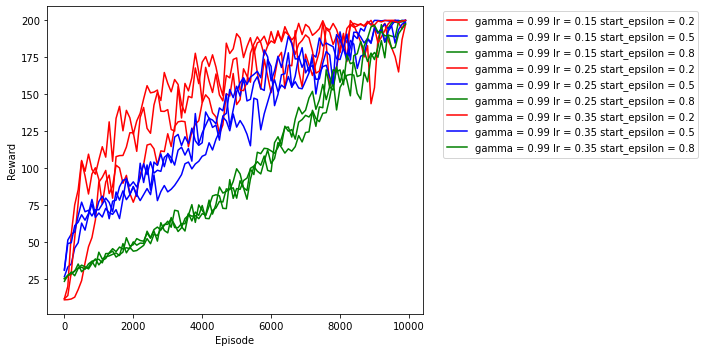

In [117]:
# load q_table_list and data_list

plt.figure(figsize=(10,5))
for i in range(len(data_list_g99)):
    gamma = data_list_g99[i]['gamma']
    lr = data_list_g99[i]['lr']
    epsilon = data_list_g99[i]['epsilon'][0]

    # color based on lr
    # if lr == 0.15:
    #     color = 'red'
    # elif lr == 0.25:
    #     color = 'blue'
    # elif lr == 0.35:
    #     color = 'green'
    # color based on epsilon
    if epsilon == 0.2:
        color = 'red'
    elif epsilon == 0.5:
        color = 'blue'
    elif epsilon == 0.8:
        color = 'green'
    plt.plot(ep, data_list_g99[i]['avg'], label='gamma = {} lr = {} start_epsilon = {}'.format(gamma, lr, epsilon), color=color)
# start y axis from 0
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()

In [110]:
# calculate quantitative statistics
epsilon_02_reward = [i['reward'] for i in data_list_g99 if i['epsilon'][0] == 0.2]
epsilon_05_reward = [i['reward'] for i in data_list_g99 if i['epsilon'][0] == 0.5]
epsilon_08_reward = [i['reward'] for i in data_list_g99 if i['epsilon'][0] == 0.8]

#  unnest nested list
epsilon_02_reward = [item for sublist in epsilon_02_reward for item in sublist]
epsilon_05_reward = [item for sublist in epsilon_05_reward for item in sublist]
epsilon_08_reward = [item for sublist in epsilon_08_reward for item in sublist]


In [115]:
# print
print('Epsilon 0.2 Reward: Mean: {:.1f}, Median: {:.1f}, Std: {:.1f}'.format(np.mean(epsilon_02_reward), np.median(epsilon_02_reward), np.std(epsilon_02_reward)))
print('Epsilon 0.5 Reward: Mean: {:.1f}, Median: {:.1f}, Std: {:.1f}'.format(np.mean(epsilon_05_reward), np.median(epsilon_05_reward), np.std(epsilon_05_reward)))
print('Epsilon 0.8 Reward: Mean: {:.1f}, Median: {:.1f}, Std: {:.1f}'.format(np.mean(epsilon_08_reward), np.median(epsilon_08_reward), np.std(epsilon_08_reward)))

Epsilon 0.2 Reward: Mean: 7594.0, Median: 7027.5, Std: 5112.6
Epsilon 0.5 Reward: Mean: 6722.1, Median: 5872.5, Std: 4711.4
Epsilon 0.8 Reward: Mean: 4998.2, Median: 3757.0, Std: 4194.7


In [114]:
# calculate average reward for each epsilon
avg_reward_02 = np.mean(epsilon_02_reward)
avg_reward_05 = np.mean(epsilon_05_reward)
avg_reward_08 = np.mean(epsilon_08_reward)

# calculate median
median_reward_02 = np.median(epsilon_02_reward)
median_reward_05 = np.median(epsilon_05_reward)
median_reward_08 = np.median(epsilon_08_reward)

# calulate std
std_reward_02 = np.std(epsilon_02_reward)
std_reward_05 = np.std(epsilon_05_reward)
std_reward_08 = np.std(epsilon_08_reward)



30000